In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import check_output
import sys

import warnings
#warnings.filterwarnings('ignore')

In [2]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


def initialize(dim):
    """

    :param dim: size of vector w initilazied with zeros
    :return:
    """
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b


def propagate(w, b, X, Y):
    """

    :param w: weights for w
    :param b: bias
    :param X: size of data(no of features, no of examples)
    :param Y: true label
    :return:
    """
    m = X.shape[1]  # getting no of rows

    # Forward Prop
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    # backwar prop
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost


def optimize(w, b, X, Y, num_iters, alpha, print_cost=False):
    """

    :param w: weights for w
    :param b: bias
    :param X: size of data(no of features, no of examples)
    :param Y: true label
    :param num_iters: number of iterations for gradient
    :param alpha:
    :return:
    """

    costs = []
    for i in range(num_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    """

    :param w:
    :param b:
    :param X:
    :return:
    """
    m = X.shape[1]
    y_pred = np.zeros(shape=(1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        y_pred[0, i] = 1 if A[0, i] > 0.5 else 0

    assert (y_pred.shape == (1, m))
    return y_pred


def model(X_train, Y_train, num_iters=2000, alpha=0.5, print_cost=False):
    """

    :param X_train:
    :param Y_train:
    :param X_test:
    :param Y_test:
    :param num_iterations:
    :param learning_rate:
    :param print_cost:
    :return:
    """
    
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iters, alpha, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    X_test = pd.read_csv("input/test_cancer_data.csv")
    X_test = np.array(X_test)
    X_test = X_test.T
    Y_test = pd.read_csv("input/test_cancer_data_y.csv")
    Y_test = np.array(Y_test)
    Y_test = Y_test.T
    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    y_prediction_train = predict(w, b, X_train)
    y_prediction_test = predict(w, b, X_test)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100))
    predList = y_prediction_train.tolist()
    tlist = Y_train.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("On training set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    print("\ntest accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100))

    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predList = y_prediction_test.tolist()
    tlist = Y_test.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("On Test set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))
    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": alpha,
         "num_iterations": num_iters}

    # Plot learning curve (with costs)
    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(d["learning_rate"]))
    plt.show()

    return d

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.662924
Cost after iteration 200: 0.658890
Cost after iteration 300: 0.655107
Cost after iteration 400: 0.651429
Cost after iteration 500: 0.647851
Cost after iteration 600: 0.644368
Cost after iteration 700: 0.640976
Cost after iteration 800: 0.637671
Cost after iteration 900: 0.634449
Cost after iteration 1000: 0.631305
Cost after iteration 1100: 0.628237
Cost after iteration 1200: 0.625242
Cost after iteration 1300: 0.622316
Cost after iteration 1400: 0.619456
Cost after iteration 1500: 0.616660
Cost after iteration 1600: 0.613925
Cost after iteration 1700: 0.611249
Cost after iteration 1800: 0.608629
Cost after iteration 1900: 0.606063
Cost after iteration 2000: 0.603550
Cost after iteration 2100: 0.601087
Cost after iteration 2200: 0.598672
Cost after iteration 2300: 0.596304
Cost after iteration 2400: 0.593981
Cost after iteration 2500: 0.591701
Cost after iteration 2600: 0.589464
Cost after iteration 2700: 0.587267
Cost

Cost after iteration 22700: 0.410285
Cost after iteration 22800: 0.409867
Cost after iteration 22900: 0.409450
Cost after iteration 23000: 0.409035
Cost after iteration 23100: 0.408622
Cost after iteration 23200: 0.408210
Cost after iteration 23300: 0.407801
Cost after iteration 23400: 0.407393
Cost after iteration 23500: 0.406987
Cost after iteration 23600: 0.406583
Cost after iteration 23700: 0.406180
Cost after iteration 23800: 0.405779
Cost after iteration 23900: 0.405380
Cost after iteration 24000: 0.404983
Cost after iteration 24100: 0.404587
Cost after iteration 24200: 0.404193
Cost after iteration 24300: 0.403800
Cost after iteration 24400: 0.403410
Cost after iteration 24500: 0.403021
Cost after iteration 24600: 0.402633
Cost after iteration 24700: 0.402247
Cost after iteration 24800: 0.401863
Cost after iteration 24900: 0.401480
Cost after iteration 25000: 0.401099
Cost after iteration 25100: 0.400720
Cost after iteration 25200: 0.400342
Cost after iteration 25300: 0.399965
C

Cost after iteration 45700: 0.344944
Cost after iteration 45800: 0.344748
Cost after iteration 45900: 0.344552
Cost after iteration 46000: 0.344358
Cost after iteration 46100: 0.344163
Cost after iteration 46200: 0.343969
Cost after iteration 46300: 0.343776
Cost after iteration 46400: 0.343583
Cost after iteration 46500: 0.343391
Cost after iteration 46600: 0.343199
Cost after iteration 46700: 0.343007
Cost after iteration 46800: 0.342816
Cost after iteration 46900: 0.342626
Cost after iteration 47000: 0.342436
Cost after iteration 47100: 0.342247
Cost after iteration 47200: 0.342058
Cost after iteration 47300: 0.341869
Cost after iteration 47400: 0.341681
Cost after iteration 47500: 0.341494
Cost after iteration 47600: 0.341306
Cost after iteration 47700: 0.341120
Cost after iteration 47800: 0.340934
Cost after iteration 47900: 0.340748
Cost after iteration 48000: 0.340563
Cost after iteration 48100: 0.340378
Cost after iteration 48200: 0.340194
Cost after iteration 48300: 0.340010
C

Cost after iteration 68800: 0.310108
Cost after iteration 68900: 0.309992
Cost after iteration 69000: 0.309877
Cost after iteration 69100: 0.309761
Cost after iteration 69200: 0.309646
Cost after iteration 69300: 0.309532
Cost after iteration 69400: 0.309417
Cost after iteration 69500: 0.309303
Cost after iteration 69600: 0.309189
Cost after iteration 69700: 0.309075
Cost after iteration 69800: 0.308961
Cost after iteration 69900: 0.308848
Cost after iteration 70000: 0.308734
Cost after iteration 70100: 0.308621
Cost after iteration 70200: 0.308509
Cost after iteration 70300: 0.308396
Cost after iteration 70400: 0.308284
Cost after iteration 70500: 0.308172
Cost after iteration 70600: 0.308060
Cost after iteration 70700: 0.307948
Cost after iteration 70800: 0.307837
Cost after iteration 70900: 0.307726
Cost after iteration 71000: 0.307615
Cost after iteration 71100: 0.307504
Cost after iteration 71200: 0.307393
Cost after iteration 71300: 0.307283
Cost after iteration 71400: 0.307173
C

Cost after iteration 92000: 0.288325
Cost after iteration 92100: 0.288249
Cost after iteration 92200: 0.288173
Cost after iteration 92300: 0.288097
Cost after iteration 92400: 0.288022
Cost after iteration 92500: 0.287946
Cost after iteration 92600: 0.287871
Cost after iteration 92700: 0.287795
Cost after iteration 92800: 0.287720
Cost after iteration 92900: 0.287645
Cost after iteration 93000: 0.287570
Cost after iteration 93100: 0.287495
Cost after iteration 93200: 0.287420
Cost after iteration 93300: 0.287346
Cost after iteration 93400: 0.287271
Cost after iteration 93500: 0.287197
Cost after iteration 93600: 0.287123
Cost after iteration 93700: 0.287049
Cost after iteration 93800: 0.286975
Cost after iteration 93900: 0.286901
Cost after iteration 94000: 0.286827
Cost after iteration 94100: 0.286753
Cost after iteration 94200: 0.286680
Cost after iteration 94300: 0.286606
Cost after iteration 94400: 0.286533
Cost after iteration 94500: 0.286460
Cost after iteration 94600: 0.286387
C

Cost after iteration 115300: 0.273387
Cost after iteration 115400: 0.273333
Cost after iteration 115500: 0.273279
Cost after iteration 115600: 0.273225
Cost after iteration 115700: 0.273172
Cost after iteration 115800: 0.273118
Cost after iteration 115900: 0.273064
Cost after iteration 116000: 0.273011
Cost after iteration 116100: 0.272957
Cost after iteration 116200: 0.272904
Cost after iteration 116300: 0.272850
Cost after iteration 116400: 0.272797
Cost after iteration 116500: 0.272744
Cost after iteration 116600: 0.272691
Cost after iteration 116700: 0.272637
Cost after iteration 116800: 0.272584
Cost after iteration 116900: 0.272531
Cost after iteration 117000: 0.272479
Cost after iteration 117100: 0.272426
Cost after iteration 117200: 0.272373
Cost after iteration 117300: 0.272320
Cost after iteration 117400: 0.272268
Cost after iteration 117500: 0.272215
Cost after iteration 117600: 0.272163
Cost after iteration 117700: 0.272110
Cost after iteration 117800: 0.272058
Cost after i

Cost after iteration 137600: 0.262878
Cost after iteration 137700: 0.262837
Cost after iteration 137800: 0.262796
Cost after iteration 137900: 0.262755
Cost after iteration 138000: 0.262714
Cost after iteration 138100: 0.262673
Cost after iteration 138200: 0.262632
Cost after iteration 138300: 0.262591
Cost after iteration 138400: 0.262550
Cost after iteration 138500: 0.262509
Cost after iteration 138600: 0.262469
Cost after iteration 138700: 0.262428
Cost after iteration 138800: 0.262388
Cost after iteration 138900: 0.262347
Cost after iteration 139000: 0.262306
Cost after iteration 139100: 0.262266
Cost after iteration 139200: 0.262226
Cost after iteration 139300: 0.262185
Cost after iteration 139400: 0.262145
Cost after iteration 139500: 0.262105
Cost after iteration 139600: 0.262064
Cost after iteration 139700: 0.262024
Cost after iteration 139800: 0.261984
Cost after iteration 139900: 0.261944
Cost after iteration 140000: 0.261904
Cost after iteration 140100: 0.261864
Cost after i

Cost after iteration 160100: 0.254658
Cost after iteration 160200: 0.254626
Cost after iteration 160300: 0.254593
Cost after iteration 160400: 0.254561
Cost after iteration 160500: 0.254529
Cost after iteration 160600: 0.254496
Cost after iteration 160700: 0.254464
Cost after iteration 160800: 0.254432
Cost after iteration 160900: 0.254399
Cost after iteration 161000: 0.254367
Cost after iteration 161100: 0.254335
Cost after iteration 161200: 0.254303
Cost after iteration 161300: 0.254271
Cost after iteration 161400: 0.254239
Cost after iteration 161500: 0.254207
Cost after iteration 161600: 0.254175
Cost after iteration 161700: 0.254143
Cost after iteration 161800: 0.254111
Cost after iteration 161900: 0.254079
Cost after iteration 162000: 0.254047
Cost after iteration 162100: 0.254015
Cost after iteration 162200: 0.253983
Cost after iteration 162300: 0.253951
Cost after iteration 162400: 0.253920
Cost after iteration 162500: 0.253888
Cost after iteration 162600: 0.253856
Cost after i

C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply



Cost after iteration 174100: nan
Cost after iteration 174200: nan
Cost after iteration 174300: nan
Cost after iteration 174400: nan
Cost after iteration 174500: nan
Cost after iteration 174600: nan
Cost after iteration 174700: nan
Cost after iteration 174800: nan
Cost after iteration 174900: nan
train accuracy: 91.62679425837321 %
On training set:
True Positive:   148
True Negative:   235
False Negative:   28
False Positive:   7
True Positive Rate / Recall: 84.09%
Precision: 95.48%
False Positive Rate / Fallout: 2.89%

test accuracy: 91.94630872483222 %
On Test set:
True Positive:   29
True Negative:   108
False Negative:   6
False Positive:   6
True Positive Rate / Recall: 82.86%
Precision: 82.86%
False Positive Rate / Fallout: 5.26%


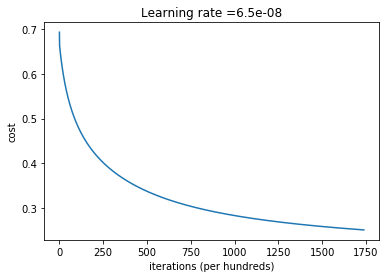

In [3]:

# Logistic Regression as deep learning

train_x = pd.read_csv("input/cancer_data.csv")
train_x = np.array(train_x)
train_y = pd.read_csv("input/cancer_data_y.csv")
train_y = np.array(train_y)
# 0.00002-92
# 0.000005-92, 93 when 200000 190500

d = model(train_x.T, train_y.T, num_iters=175000, alpha=0.000000065, print_cost=True)

